# study of cantilever beam

Consider a cantilever beam using the Finite Element Method library GetFEM.

## Install Libraries
First, install GetFEM.

In [ ]:
!apt install python-getfem++=5.2+dfsg1-6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-getfem++ is already the newest version (5.2+dfsg1-6).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


Next, install the visualization software Mayavi2.

In [ ]:
!apt install mayavi2=4.5.0-1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host cython geoclue-2.0 geoip-database
  gstreamer1.0-plugins-base iio-sensor-proxy javascript-common libaudio2
  libavahi-core7 libavahi-glib1 libbind9-160 libbrotli1 libcap2-bin
  libcdparanoia0 libdaemon0 libdns1100 libgeoclue-2-0 libgeoip1
  libgl1-mesa-glx libgstreamer-plugins-base1.0-0 libgstreamer1.0-0 libhyphen0
  libisc169 libisccc160 libisccfg160 libjs-jquery libjs-sphinxdoc
  libjs-underscore liblwres160 libmbim-glib4 libmbim-proxy libmm-glib0 libmng2
  libnl-genl-3-200 libnotify4 libnss-mdns liborc-0.4-0 libpam-cap libqmi-glib5
  libqmi-proxy libqt4-dbus libqt4-declarative libqt4-designer libqt4-help
  libqt4-network libqt4-script libqt4-scripttools libqt4-sql libqt4-sql-mysql
  libqt4-svg libqt4-test libqt4-xml libqt4-xmlpatterns libqt5opengl5
  libqt5positioning5 libqt5qml5 libqt5quick5 libqt5sensors5 lib

Since there is no display on colab, we set up a virtual display for Mayavi2.

In [ ]:
!apt-get -y install xvfb=2:1.19.6-1ubuntu4.4
!pip install pyvirtualdisplay==0.2.5

from pyvirtualdisplay import Display
import os

display = Display(visible=0, size=(1280, 1024))
display.start()
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 784 kB in 1s (705 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 143671 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.4_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.4) ...
Setting up xvfb (2:1.19.6-1ubuntu4.4) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


No handlers could be found for logger "pyvirtualdisplay.abstractdisplay"


## Creating a Model

Now we are ready, import the library.

In [ ]:
import getfem as gf
import numpy as np
import pandas as pd
import numpy.testing as npt


The review cases are as follows. GetFEM uses FEM_PRODUCT and IM_PRODUCT to two-dimensional the finite element method and the integration method, respectively. For quadratic elements, the Gaussian integration point is 3. IM_GAUSS1D(K) represents the integration point of $K/2+1$ points. The element uses plane strain elements. Set up these meshes, the finite element method and the integration method.

In [ ]:
cases = [
    "case11",
    "case12",
    "case13",
    "case14",
    "case21",
    "case22",
    "case23",
    "case24",
    "case31",
    "case32",
    "case33",
    "case34",
    "case41",
    "case42",
    "case43",
    "case44",
]


In [ ]:
xs = [
    4,
    4,
    4,
    16,
    4,
    4,
    4,
    16,
    4,
    4,
    4,
    16,
    4,
    4,
    4,
    16,
]
ys = [
    1,
    2,
    4,
    8,
    1,
    2,
    4,
    8,
    1,
    2,
    4,
    8,
    1,
    2,
    4,
    8,
]


In [ ]:
fem_names = [
    "FEM_PK(1, 2)",
    "FEM_PK(1, 2)",
    "FEM_PK(1, 2)",
    "FEM_PK(1, 2)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
]


In [ ]:
methods = [
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
]


In [ ]:
pd.options.display.float_format = "{:.2f}".format


data = []

columns = ["Case Name", "Mesh", "Finite Element Method", "Integration Method"]

for case, x, y, fem_name, method in zip(cases, xs, ys, fem_names, methods):
    data.append([case, str(x) + "x" + str(y), fem_name, method])

df = pd.DataFrame(data=data, columns=columns)
df


,Case Name,Mesh,Finite Element Method,Integration Method
0,case11,4x1,"FEM_PK(1, 2)",IM_GAUSS1D(4)
1,case12,4x2,"FEM_PK(1, 2)",IM_GAUSS1D(4)
2,case13,4x4,"FEM_PK(1, 2)",IM_GAUSS1D(4)
3,case14,16x8,"FEM_PK(1, 2)",IM_GAUSS1D(4)
4,case21,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(2)
5,case22,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(2)
6,case23,4x4,"FEM_PK(1, 1)",IM_GAUSS1D(2)
7,case24,16x8,"FEM_PK(1, 1)",IM_GAUSS1D(2)
8,case31,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(0)
9,case32,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(0)


### Mesh

The overall size of the model is L = 10 mm in length, h = 1 mm in height, and b = 1 mm in depth. In general, a slender ratio of 1: 10 is considered a beam element.

In [ ]:
L = 10.0
b = 1.0
h = 1.0

meshs = []

for case, x, y in zip(cases, xs, ys):
    X = np.arange(x + 1) * L / x
    Y = np.arange(y + 1) * h / y
    mesh = gf.Mesh("cartesian", X, Y)
    meshs.append(mesh)
    mesh.export_to_vtk("mesh_" + case + ".vtk")


Outputs an image of each mesh.

In [ ]:
from mayavi import mlab

mlab.init_notebook()

for case in cases:
    vtk_file_reader = mlab.pipeline.open("mesh_" + case + ".vtk")
    extract_edges = mlab.pipeline.extract_edges(vtk_file_reader)
    surface = mlab.pipeline.surface(extract_edges)
    mlab.show()
    mlab.savefig("mesh_" + case + ".png")
    mlab.clf()


/usr/lib/python2.7/dist-packages/traits/etsconfig/etsconfig.py:429: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  (environment_variable, parent_directory))


Notebook initialized with x3d backend.


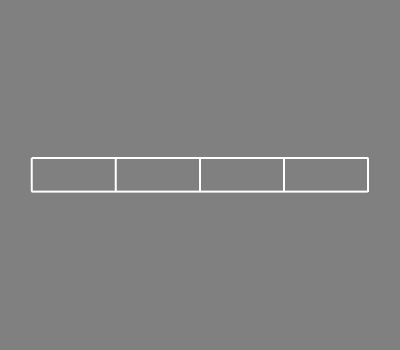

In [ ]:
from IPython.display import Image, display_png

display_png(Image("mesh_" + cases[0] + ".png"))


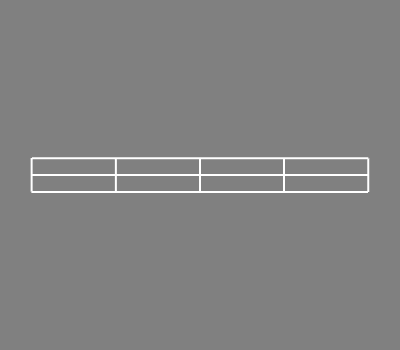

In [ ]:
from IPython.display import Image, display_png

display_png(Image("mesh_" + cases[1] + ".png"))


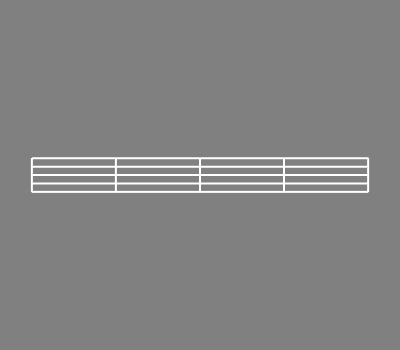

In [ ]:
from IPython.display import Image, display_png

display_png(Image("mesh_" + cases[2] + ".png"))


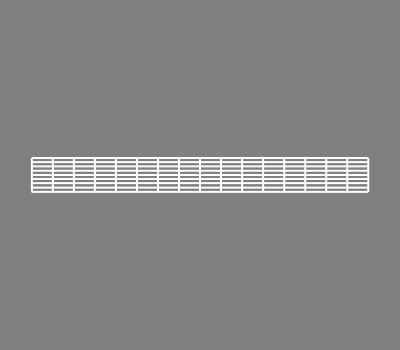

In [ ]:
from IPython.display import Image, display_png

display_png(Image("mesh_" + cases[3] + ".png"))


### Region

Sets the area on the left side of the mesh where the Dirichlet condition is set. The right side sets the area for setting the Neumann condition.

In [ ]:
TOP_BOUND = 1
RIGHT_BOUND = 2
LEFT_BOUND = 3
BOTTOM_BOUND = 4

for mesh in meshs:
    fb1 = mesh.outer_faces_with_direction([0.0, 1.0], 0.01)
    fb2 = mesh.outer_faces_with_direction([1.0, 0.0], 0.01)
    fb3 = mesh.outer_faces_with_direction([-1.0, 0.0], 0.01)
    fb4 = mesh.outer_faces_with_direction([0.0, -1.0], 0.01)
    mesh.set_region(TOP_BOUND, fb1)
    mesh.set_region(RIGHT_BOUND, fb2)
    mesh.set_region(LEFT_BOUND, fb3)
    mesh.set_region(BOTTOM_BOUND, fb4)


### Finite Element Method
Create a MeshFem object and associate the mesh with the finite element method.

In [ ]:
fems = []
for fem_name in fem_names:
    fems.append(gf.Fem("FEM_PRODUCT(" + fem_name + "," + fem_name + ")"))


In [ ]:
mfus = []
for mesh, fem in zip(meshs, fems):
    mfu = gf.MeshFem(mesh, 2)
    mfu.set_fem(fem)
    mfus.append(mfu)


### Integral method
Associate the integration method with the mesh.

In [ ]:
ims = []
for method in methods:
    ims.append(gf.Integ("IM_PRODUCT(" + method + ", " + method + ")"))


In [ ]:
mims = []
for mesh, im in zip(meshs, ims):
    mim = gf.MeshIm(mesh, im)
    mims.append(mim)


### Variable
Define the model object and set the variable "u".

In [ ]:
mds = []
for mfu in mfus:
    md = gf.Model("real")
    md.add_fem_variable("u", mfu)
    mds.append(md)


### Properties
Define properties as constants for the model object. The Young's modulus of steel is $E = 205000\times 10^6N/m^2$. Also set Poisson's ratio $\nu = 0.0$ to ignore the Poisson effect.

In [ ]:
E = 10000  # N/mm2
Nu = 0.0

for md in mds:
    md.add_initialized_data("E", E)
    md.add_initialized_data("Nu", Nu)


### Plane Strain Element
Defines the plane strain element for variable 'u'.

In [ ]:
for md, mim in zip(mds, mims):
    md.add_isotropic_linearized_elasticity_brick_pstrain(mim, "u", "E", "Nu")


### Boundary Conditions

Set the Dirichlet condition for the region on the left side.

In [ ]:
for (md, mim, mfu, fem) in zip(mds, mims, mfus, fems):
    if fem.is_lagrange():
        md.add_Dirichlet_condition_with_simplification("u", LEFT_BOUND)
    else:
        md.add_Dirichlet_condition_with_multipliers(mim, "u", mfu, LEFT_BOUND)


Set the Neumann boundary condition on the right side.

In [ ]:
F = 1.0  # N/mm2
for (md, mfu, mim) in zip(mds, mfus, mims):
    md.add_initialized_data("F", [0, F / (b * h)])
    md.add_source_term_brick(mim, "u", "F", RIGHT_BOUND)


## Solve

Solve the simultaneous equations of the model object to find the value of the variable 'u'.

In [ ]:
for md in mds:
    md.solve()


After solving simultaneous equations, the right side rhs can be output. The sum of the right-hand terms equals $F*b*h$.

In [ ]:
#for case, md in zip(cases, mds):
#    npt.assert_almost_equal(sum(md.rhs()), F*b*h)


The constraint on the left end has a displacement of 0.0.

In [ ]:
for md, mfu, case in zip(mds, mfus, cases):
    u = md.variable('u')
    dof = mfu.basic_dof_on_region(LEFT_BOUND)
    npt.assert_almost_equal(abs(np.max(u[dof])), 0.0)

## Review results

Output and visualize the results of each case to vtk files.

In [ ]:
for md, mfu, case in zip(mds, mfus, cases):
    u = md.variable("u")
    mfu.export_to_vtk("u_" + case + ".vtk", "ascii", mfu, u, "u")


In [ ]:
from mayavi import mlab

mlab.init_notebook()

for case in cases:
    vtk_file_reader = mlab.pipeline.open("u_" + case + ".vtk")
    extract_edges = mlab.pipeline.extract_edges(vtk_file_reader)
    warp_vector = mlab.pipeline.warp_vector(extract_edges)
    surface = mlab.pipeline.surface(warp_vector)
    mlab.show()
    mlab.savefig("u_" + case + ".png")
    mlab.clf()


Notebook initialized with x3d backend.


### Computation of Theoretical Solutions
Calculates the deflection at each coordinate for comparison with the theoretical solution. The theoretical solution for a cantilever beam subjected to a concentrated load is as follows.

$w\left(x\right)=\dfrac{FL^3}{3EI}$

In [ ]:
I = b * h ** 3 / 12
w = F * L ** 3 / (3 * E * I)
w


0.4

### deformation diagram of case11

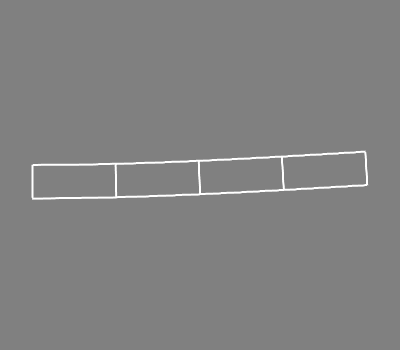

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case11" + ".png"))


### deformation diagram of case12

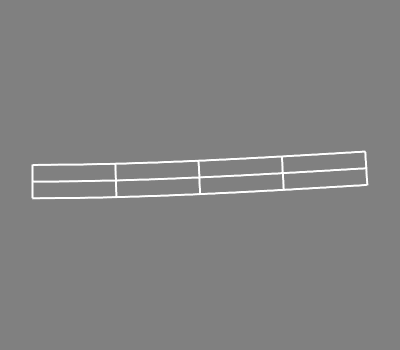

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case12" + ".png"))


### deformation diagram of case13

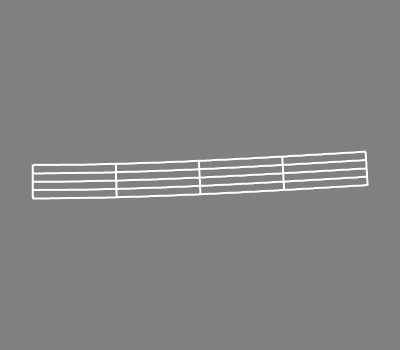

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case13" + ".png"))


### deformation diagram of case14

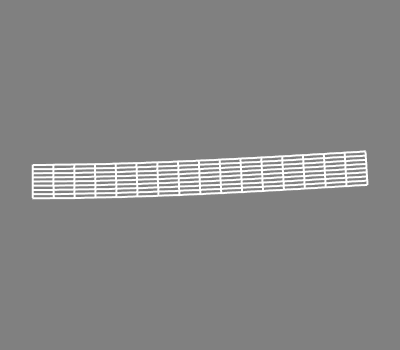

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case14" + ".png"))


### deformation diagram of case21

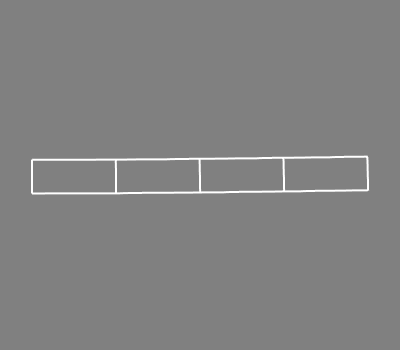

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case21" + ".png"))


### deformation diagram of case22

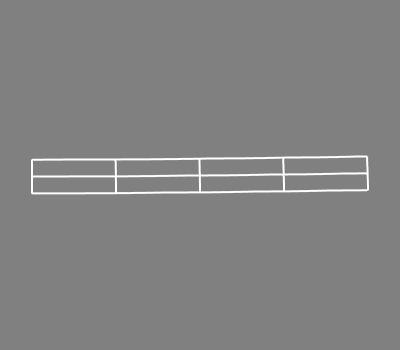

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case22" + ".png"))


### deformation diagram of case23

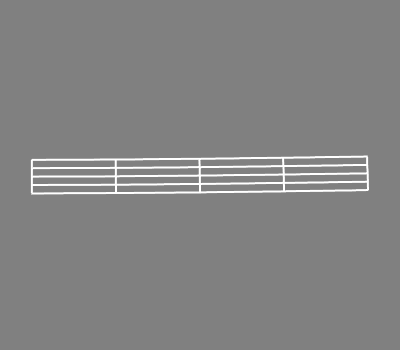

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case23" + ".png"))


### deformation diagram of case24

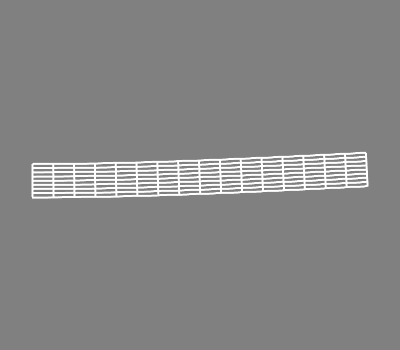

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case24" + ".png"))


### deformation diagram of case31

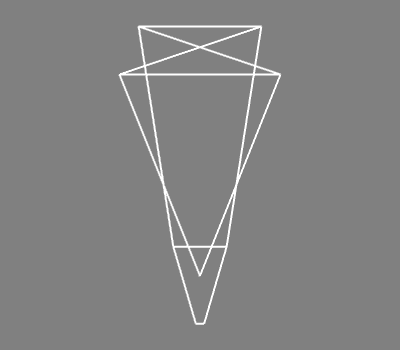

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case31" + ".png"))


### deformation diagram of case32

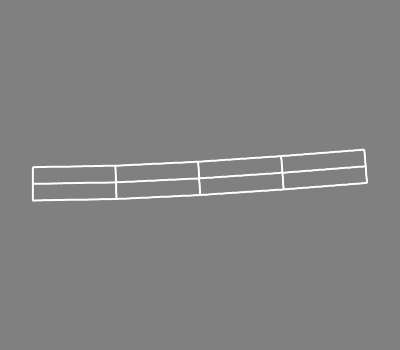

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case32" + ".png"))


### deformation diagram of case33

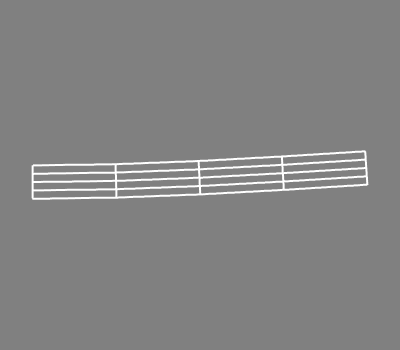

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case33" + ".png"))


### deformation diagram of case34

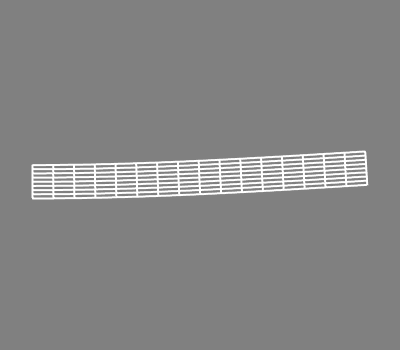

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case34" + ".png"))


### deformation diagram of case41

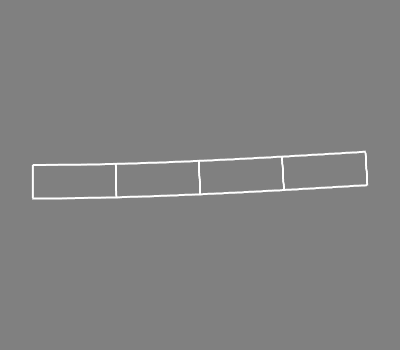

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case41" + ".png"))


### deformation diagram of case42

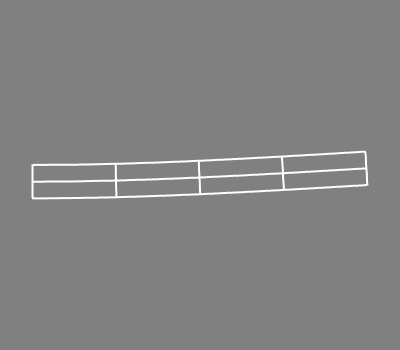

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case42" + ".png"))


### deformation diagram of case43

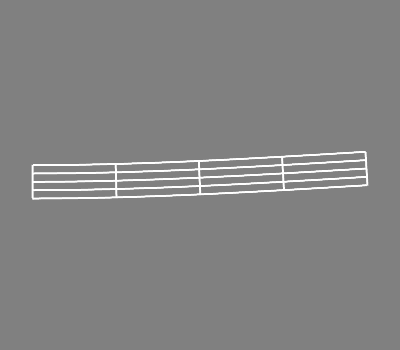

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case43" + ".png"))


### deformation diagram of case44

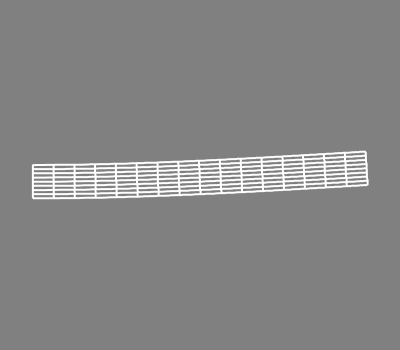

In [ ]:
from IPython.display import Image, display_png

display_png(Image("u_" + "case44" + ".png"))


### Comparison with Theoretical Solutions

In [ ]:
b = 1.0
I = b*h**3.0/12.0
dmax = 1.0/3.0*(F*L**3)/(E*I)
dmax

0.4

Calculates the ratio of deformation to theoretical solution for each case.


In [ ]:
pd.options.display.float_format = "{:.2f}".format


data = []

columns = [
    "case name",
    "mesh",
    "finite element method",
    "integration method",
    "ratio with theory",
]

for case, x, y, fem_name, method, md, mfu in zip(
    cases, xs, ys, fem_names, methods, mds, mfus
):
    u = md.variable("u")
    dof = mfu.basic_dof_on_region(RIGHT_BOUND)
    data.append([case, str(x) + "x" + str(y), fem_name, method, max(u[dof] / dmax)])
df = pd.DataFrame(data=data, columns=columns)
df


,case name,mesh,finite element method,integration method,ratio with theory
0,case11,4x1,"FEM_PK(1, 2)",IM_GAUSS1D(4),1.00
1,case12,4x2,"FEM_PK(1, 2)",IM_GAUSS1D(4),1.00
2,case13,4x4,"FEM_PK(1, 2)",IM_GAUSS1D(4),1.00
3,case14,16x8,"FEM_PK(1, 2)",IM_GAUSS1D(4),1.01
4,case21,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(2),0.24
5,case22,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(2),0.24
6,case23,4x4,"FEM_PK(1, 1)",IM_GAUSS1D(2),0.24
7,case24,16x8,"FEM_PK(1, 1)",IM_GAUSS1D(2),0.84
8,case31,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(0),65235544550.74
9,case32,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(0),1.32
